![header](https://drive.google.com/uc?export=view&id=1KuEspEp7OwqGw6uMRJvYE6BVE-Zo-8JF)

 <h1> <div align="center"> Dr. David Antonio-Torres</div> </h1>

# Redes Neuronales Convolucionales
### Se hace uso del dataset MNIST para reconocimiento de dígitos

# Se cargan las bibliotecas necesarias

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
import random
     
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
     
from keras.models import Model

np.random.seed(0)

# Se carga el dataset y se verifica el número de muestras en cada set
### Nótese que al hacer la carga, se genera automáticamente el set de entrenamiento y el set de pruebas
### Las imágenes son en escala de grises y de 28 por 28 pixeles

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
     
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


# Se verifica el número de muestras por dígito

Text(0, 0.5, 'Número de Muestras')

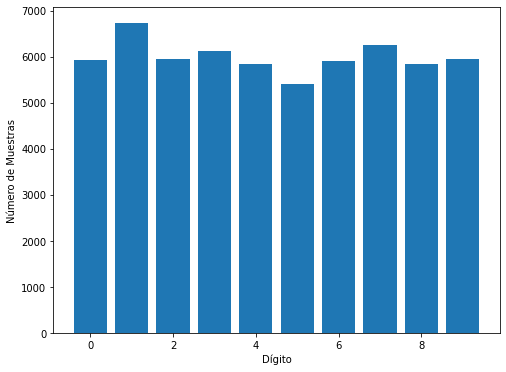

In [3]:
n_muestras = []
n_digitos = 10

for n in range(n_digitos):
    x_sel = X_train[y_train == n]
    n_muestras.append(len(x_sel))
plt.figure(figsize=(8,6))
plt.bar(range(0,n_digitos), n_muestras)
plt.xlabel("Dígito")
plt.ylabel("Número de Muestras")

# Las imágenes del dataset deben ser presentadas de la forma indicada para la CNN
### 28 x 28 x 1, es decir, escala de grises

In [4]:
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

# One-hot Encoding para las etiquetas de ambos sets

In [5]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Se normalizan las intensidades de los pixeles en un intervalo de 0 y 1

In [6]:
X_train = X_train/255 
X_test = X_test/255

# Se define el modelo LeNet
![header](https://drive.google.com/uc?export=view&id=1U18F5v5_EzcmuE1UgIOv-VPzPM4aCZ05)
### https://www.researchgate.net/figure/The-LeNet-5-Architecture-a-convolutional-neural-network_fig4_321586653
### En Conv2D, por omisión: strides=(1,1), padding = "valid" (sin padding)
### Al indicar padding = "same", las dimensiones de la imagen de entrada y de salida serán iguales, al agregar ceros alrededor de la imagen de entrada

In [7]:
model = Sequential()

model.add(Conv2D(filters = 30, kernel_size = (5, 5), input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters = 15, kernel_size = (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# Flatten hace unidimensional las imágenes resultantes
model.add(Flatten())
# Fully connected
model.add(Dense(units = 500, activation='relu'))
#model.add(Dropout(0.5))
# Fully connected
model.add(Dense(units = n_digitos, activation='softmax'))

model.compile(Adam(lr = 0.01), loss='categorical_crossentropy', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 30)        780       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 30)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 15)        4065      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 15)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 375)               0         
                                                                 
 dense (Dense)               (None, 500)               1

/usr/local/lib/python3.9/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


# Se separa un 10% del set de entrenamiento para fines de validación

In [8]:
history = model.fit(X_train, y_train, validation_split=0.1, epochs = 10, batch_size = 400, verbose = 1, shuffle = 1)

Epoch 1/10
135/135 [==============================] - 11s 8ms/step - loss: 0.2525 - accuracy: 0.9225 - val_loss: 0.0527 - val_accuracy: 0.9865
Epoch 2/10
135/135 [==============================] - 1s 6ms/step - loss: 0.0529 - accuracy: 0.9834 - val_loss: 0.0465 - val_accuracy: 0.9863
Epoch 3/10
135/135 [==============================] - 1s 6ms/step - loss: 0.0383 - accuracy: 0.9878 - val_loss: 0.0370 - val_accuracy: 0.9893
Epoch 4/10
135/135 [==============================] - 1s 6ms/step - loss: 0.0298 - accuracy: 0.9904 - val_loss: 0.0443 - val_accuracy: 0.9883
Epoch 5/10
135/135 [==============================] - 1s 6ms/step - loss: 0.0258 - accuracy: 0.9915 - val_loss: 0.0400 - val_accuracy: 0.9893
Epoch 6/10
135/135 [==============================] - 1s 6ms/step - loss: 0.0255 - accuracy: 0.9918 - val_loss: 0.0415 - val_accuracy: 0.9897
Epoch 7/10
135/135 [==============================] - 1s 6ms/step - loss: 0.0219 - accuracy: 0.9924 - val_loss: 0.0468 - val_accuracy: 0.9893
Epoch

In [9]:
scores = model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.0554 - accuracy: 0.9845
Test loss: 0.05537467077374458
Test accuracy: 0.984499990940094


Text(0.5, 0, 'epoch')

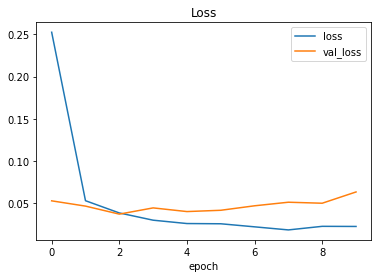

In [10]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('Loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

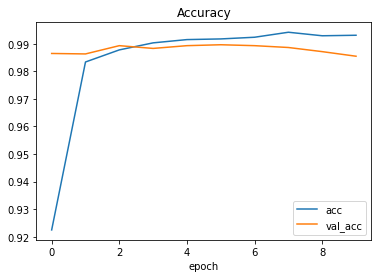

In [11]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['acc', 'val_acc'])
plt.title('Accuracy')
plt.xlabel('epoch')

# Se somete a prueba con una imagen de la web

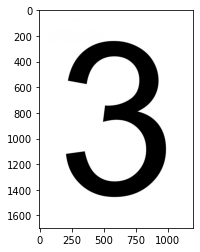

In [12]:
import requests
from PIL import Image
     
url = 'https://printables.space/files/uploads/download-and-print/large-printable-numbers/3-a4-1200x1697.jpg'
response = requests.get(url, stream=True)
img = Image.open(response.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))

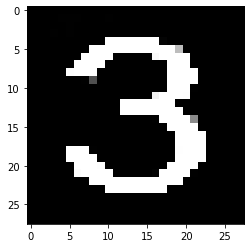

In [13]:
import cv2
     
img_arr = np.asarray(img)
img_rs = cv2.resize(img_arr, (28, 28))
img_gray = cv2.cvtColor(img_rs, cv2.COLOR_BGR2GRAY)
img_not = cv2.bitwise_not(img_gray)
plt.imshow(img_not, cmap=plt.get_cmap('gray'))
     


In [14]:
img_not = img_not/255
img_resh = img_not.reshape(1, 28, 28, 1)

prediction = np.argmax(model.predict(img_resh), axis=-1)
print("predicted digit:", str(prediction))

1/1 [==============================] - 0s 132ms/step
predicted digit: [3]


# Guardando y descargando el modelo

In [15]:
model.save('model.h5')

from google.colab import files
files.download('model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Gracias por la atención